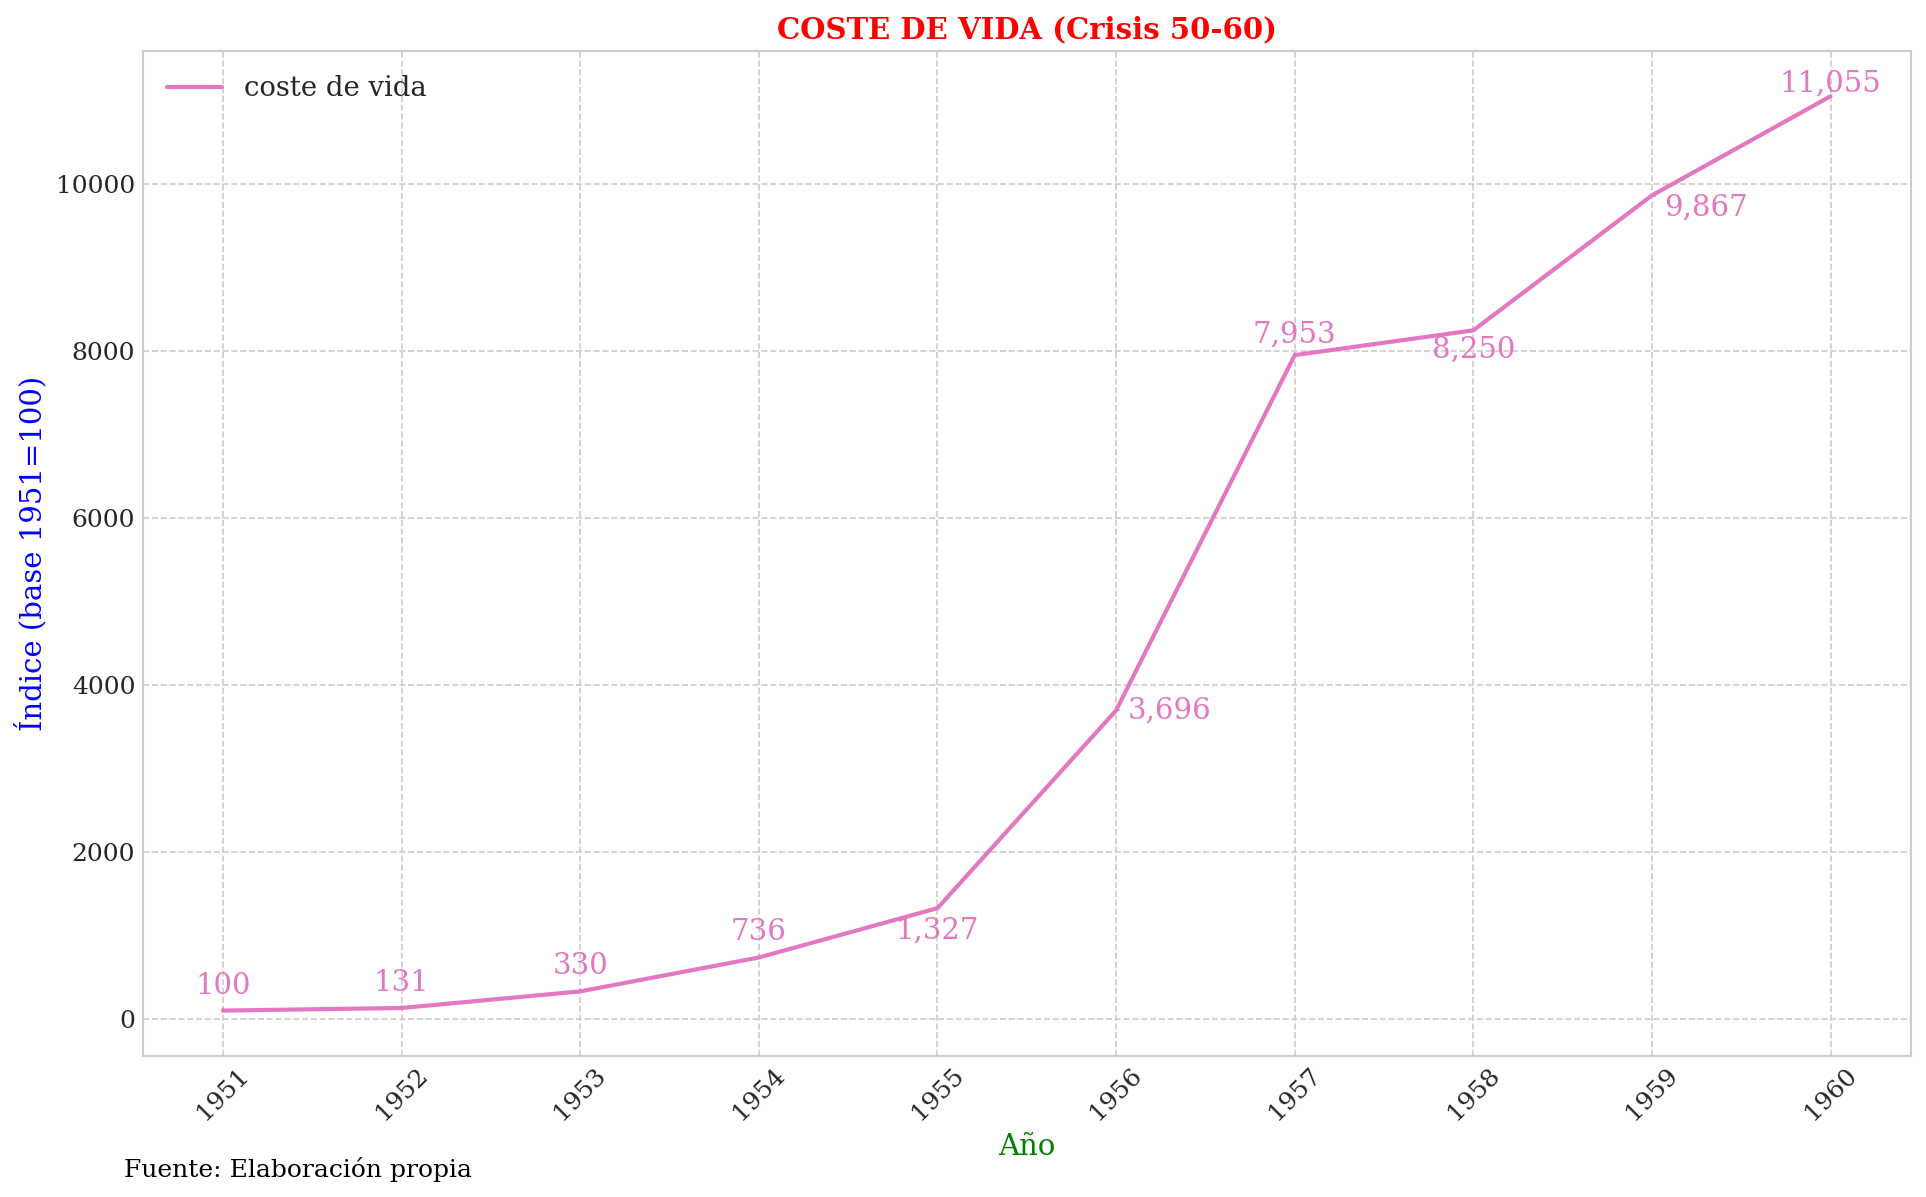

In [1]:
import sys, os
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

# Si aún no instalaste el paquete en editable, descomenta la siguiente línea:
# sys.path.append(os.path.abspath('../'))

from func_auxiliares.graficos_utils import (
    get_df, set_style, init_base_plot,
    add_year_value_annotations
)
from func_auxiliares.config import (
    DB_PATH, ASSETS_DIR,
    PERIODOS_PARA_CRISIS
)
# carpeta raíz de assets/tesis/serie_completa
output_dir = ASSETS_DIR / "crisis" / "coste_de_la_vida"
output_dir.mkdir(parents=True, exist_ok=True)

# aplica tu estilo corporativo
set_style()
# ─────────────────────────────────────────────────────────────────────
# Carga de datos
# ─────────────────────────────────────────────────────────────────────
año=list(range(1951, 1961))

coste_de_la_vida = [
    100,
    131,
    330,
    736,
    1327,
    3696,
    7953,
    8250,
    9867,
    11055
]
df= pd.DataFrame({
    "Año": año,
    "coste_de_vida": coste_de_la_vida
})
df.set_index("Año", inplace=True)
# ─────────────────────────────────────────────────────────────────────
# Componentes y parámetros de graficado
# ─────────────────────────────────────────────────────────────────────
componentes = [("coste_de_vida", "coste de vida")]
cols_componentes = [col for col, _ in componentes]
colors = {"coste_de_vida": "#e377c2"}


annotation_offsets = {
    "coste_de_vida": {
        1950: (0,  200),
        1951: (0,  300),
        1952: (0,  300),
        1953: (0,  300),
        1954: (0,  300),
        1955: (0,  -270),
        1956: (0.3,  2),
        1957: (0,  250),
        1958: (0, -230),  
        1959: (0.3,  -150),
        1960: (0,  150),
    
        1980: (0.2,  10),   
        1981: (0.2,  10),
        1982: (0.2,  10),
        1983: (0.2,  10),
        1984: (0.2,  10),
        1985: (0.2,  10),
        1986: (0.2,  10),
        1987: (0.2, -15),   
        1988: (0.2,  10),
        1989: (0.2,  10),
        1990: (0.2,  10),

        2014: (0.2,  200),  
        2015: (0.2,  200),   
        2016: (0.2, -200),   
        2017: (0.2,  200),
        2018: (0.2,  200),
        2019: (0.2,  200),
        2020: (0.2, -200),   
        2022: (0.2,  200),
        2023: (0.2,  200),   
    }
}

# ─────────────────────────────────────────────────────────────────────
# Generación de gráficas por subperíodo
# ─────────────────────────────────────────────────────────────────────
for nombre, (ini, fin) in PERIODOS_PARA_CRISIS.items():
    sub = df.loc[ini:fin]
    if sub.empty:
        continue
    # Si sub tiene solo 3 datos
    if len(sub) < 3:
        print(f"Subperíodo {nombre} tiene menos de 3 datos, omitiendo.")
        continue

    years_to_annot = list(sub.index)
    fig, ax = init_base_plot(
        sub,
        series=componentes,
        colors=colors,
        title=f"COSTE DE VIDA ({nombre})",
        xlabel="Año",
        ylabel="Índice (base 1951=100)",
        source_text="Fuente: Elaboración propia",
    )
    add_year_value_annotations(
        ax,
        sub,
        years_to_annot,
        cols_componentes,
        annotation_offsets,
        colors,
        arrow_lw=0.5,
    )
    fig.savefig(output_dir / f"coste_de_la_vida_{nombre}.png")
    plt.show()
    plt.close(fig)